In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


In [2]:
df=pd.read_csv('OnlinePayments.csv')


In [3]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df['type']

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe

#bridge_types = ('type','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
#bridge_df = pd.DataFrame(bridge_types, columns=['d'])



# creating instance of labelencoder
labelencoder = LabelEncoder()
df['type']=labelencoder.fit_transform(df['type'])
df['nameOrig']=labelencoder.fit_transform(df['nameOrig'])
df['nameDest']=labelencoder.fit_transform(df['nameDest'])
# Assigning numerical values and storing in another column



In [7]:
def dataNorm(X): 
    # Normalise data points
    length = len(X.columns)
    for i in range(0, length): 
        col = X.iloc[:,i]
        max_val = col.max() 
        min_val = col.min() 
        X.iloc[:,i] = (col-min_val)/(max_val-min_val)
    return X

In [8]:
dfnorm=dataNorm(df)

In [9]:
dfnorm

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.0,0.75,0.000106,0.119287,0.002855,0.003233,0.610534,0.000000,0.000000,0.0,0.0
1,0.0,0.75,0.000020,0.344545,0.000357,0.000391,0.636919,0.000000,0.000000,0.0,0.0
2,0.0,1.00,0.000002,0.157738,0.000003,0.000000,0.161509,0.000000,0.000000,1.0,0.0
3,0.0,0.25,0.000002,0.917359,0.000003,0.000000,0.143881,0.000059,0.000000,1.0,0.0
4,0.0,0.75,0.000126,0.542392,0.000697,0.000603,0.304485,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.25,0.003674,0.889591,0.005701,0.000000,0.185818,0.000000,0.000954,1.0,0.0
6362616,1.0,1.00,0.068272,0.273445,0.105923,0.000000,0.095854,0.000000,0.000000,1.0,0.0
6362617,1.0,0.25,0.068272,0.084044,0.105923,0.000000,0.039754,0.000192,0.017912,1.0,0.0
6362618,1.0,1.00,0.009195,0.354608,0.014265,0.000000,0.117440,0.000000,0.000000,1.0,0.0


[Text(0.5, 1.0, 'Correlation Matrix')]

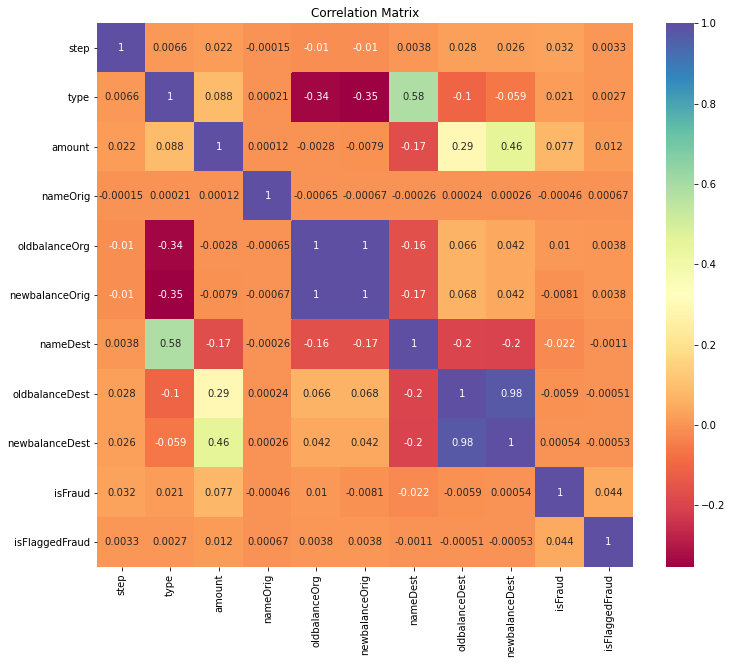

In [10]:
# Correlation matrix
corr = dfnorm.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [13]:
dfnorm_y=dfnorm['isFraud']
dfnorm_y

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
6362615    1.0
6362616    1.0
6362617    1.0
6362618    1.0
6362619    1.0
Name: isFraud, Length: 6362620, dtype: float64

In [16]:
dfnorm_x=dfnorm.drop(labels='isFraud', axis=1)
dfnorm_x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,0.75,0.000106,0.119287,0.002855,0.003233,0.610534,0.000000,0.000000,0.0
1,0.0,0.75,0.000020,0.344545,0.000357,0.000391,0.636919,0.000000,0.000000,0.0
2,0.0,1.00,0.000002,0.157738,0.000003,0.000000,0.161509,0.000000,0.000000,0.0
3,0.0,0.25,0.000002,0.917359,0.000003,0.000000,0.143881,0.000059,0.000000,0.0
4,0.0,0.75,0.000126,0.542392,0.000697,0.000603,0.304485,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.25,0.003674,0.889591,0.005701,0.000000,0.185818,0.000000,0.000954,0.0
6362616,1.0,1.00,0.068272,0.273445,0.105923,0.000000,0.095854,0.000000,0.000000,0.0
6362617,1.0,0.25,0.068272,0.084044,0.105923,0.000000,0.039754,0.000192,0.017912,0.0
6362618,1.0,1.00,0.009195,0.354608,0.014265,0.000000,0.117440,0.000000,0.000000,0.0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnorm_x, dfnorm_y, test_size=0.33, random_state=42)


In [18]:
y_train

1186641    0.0
1199598    0.0
1185636    0.0
6211424    0.0
4452703    0.0
          ... 
1570006    0.0
2234489    0.0
4926484    0.0
4304572    0.0
1692743    0.0
Name: isFraud, Length: 4262955, dtype: float64

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:

y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2096998       1]
 [   2494     172]]


In [24]:
classifier.score(X_test, y_test)

0.998811715202187

In [25]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.998811715202187


In [26]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)
ypred_prob = classifier.predict_proba(X_test) 
ypred_prob

array([[9.99740715e-01, 2.59284606e-04],
       [9.99979715e-01, 2.02847782e-05],
       [9.99821964e-01, 1.78036048e-04],
       ...,
       [9.98628748e-01, 1.37125186e-03],
       [9.99867617e-01, 1.32382980e-04],
       [9.98581233e-01, 1.41876718e-03]])

In [27]:
thetas = classifier.coef_
thetas

array([[  3.70647246,   2.21760934,  15.01118784,  -0.06201055,
         44.90423992, -37.57582522,  -6.49996027, -11.29683985,
        -13.19712345,   3.18958108]])

In [28]:
classifier.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [29]:
probability=classifier.predict_log_proba(X_train) #hypothesis
probability

array([[-2.64404237e-04, -8.23816363e+00],
       [-5.93105727e-04, -7.43043442e+00],
       [-2.43488764e-04, -8.32056150e+00],
       ...,
       [-2.61896342e-03, -5.94628588e+00],
       [-1.16087263e-03, -6.75916367e+00],
       [-9.33001047e-04, -6.97757070e+00]])

In [30]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [31]:
def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

In [32]:
def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [33]:
def cost_function( theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
   # Print('this is total cost')
   # print(total_cost)
    return total_cost

In [34]:
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return theta - (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [35]:
def gradient_descent(X, y, epoch = 10):
    dim = len(X.columns) #number of columns of X_train = 13
    X = np.array(X) #converting X_train to an array
    y = np.array(y) #converting y_train to an array
      # Initialise a random theta0 and weights (thetas) for the regression equation
    best_estimated_problist=np.array([])   
    estimated_problist=np.array([])
    costfunc = 100000
    cost = 0
    thetas = np.random.rand(dim) #13 random thetas
    bestthetas=np.array([])
    costfunclist=[]
    for e in range(0, epoch+1):
    # Calculate the probability of the values of y
        
        
        estimated_prob= probability(thetas, X)  #this is the hypothesis function
        #estimated_problist=np.append(estimated_problist,estimated_prob)
        
        # Calculate MSE
        cost = cost_function( thetas, X, y)
        #if e%10==0:
        costfunclist.append(cost)
            
        
        if cost<costfunc:
            costfunc=cost
            bestthetas=thetas
            best_estimated_problist=estimated_prob
    
        # Update thetas,
    
        
        thetas = gradient(thetas, X, y)
    
        # params = pd.DataFrame(columns=['MSE', 'theta0' , ])
    
    return best_estimated_problist, bestthetas, costfunc, costfunclist
    

In [36]:
best_estimated_problist, bestthetas, costfunc, costfunclist=gradient_descent(X_train, y_train, epoch = 10)

In [37]:
best_estimated_problist

array([0.27739347, 0.22291905, 0.3301232 , ..., 0.23099429, 0.17080339,
       0.15761303])

In [38]:
costfunc

0.23407451066728718

In [39]:
costfunclist


[1.2159323131902593,
 0.9178593914637725,
 0.7054940765107649,
 0.5610377030921362,
 0.4627994477329803,
 0.394028175186472,
 0.34401282861255206,
 0.3062746942583069,
 0.27687271568689914,
 0.2533393469378525,
 0.23407451066728718]

In [40]:
bestthetas

array([-1.21678812, -1.14540877,  0.22344497, -1.15148835,  0.88065364,
       -0.00754566, -0.11697674,  0.87473784,  0.86453318,  0.86831681])

In [41]:
z=net_input(bestthetas, X_train)
z.size

4262955

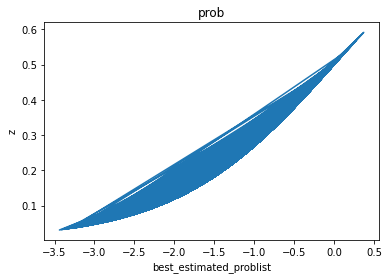

In [42]:
plt.plot( z[:100000], best_estimated_problist[:100000])
  
# naming the x axis
plt.xlabel('best_estimated_problist')
# naming the y axis
plt.ylabel('z')
  
# giving a title to my graph
plt.title('prob')
  
# function to show the plot
plt.show()

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [44]:
for train_index, test_index in kf.split(X_train):
    print(train_index, test_index)

[ 426296  426297  426298 ... 4262952 4262953 4262954] [     0      1      2 ... 426293 426294 426295]
[      0       1       2 ... 4262952 4262953 4262954] [426296 426297 426298 ... 852589 852590 852591]
[      0       1       2 ... 4262952 4262953 4262954] [ 852592  852593  852594 ... 1278885 1278886 1278887]
[      0       1       2 ... 4262952 4262953 4262954] [1278888 1278889 1278890 ... 1705181 1705182 1705183]
[      0       1       2 ... 4262952 4262953 4262954] [1705184 1705185 1705186 ... 2131477 2131478 2131479]
[      0       1       2 ... 4262952 4262953 4262954] [2131480 2131481 2131482 ... 2557772 2557773 2557774]
[      0       1       2 ... 4262952 4262953 4262954] [2557775 2557776 2557777 ... 2984067 2984068 2984069]
[      0       1       2 ... 4262952 4262953 4262954] [2984070 2984071 2984072 ... 3410362 3410363 3410364]
[      0       1       2 ... 4262952 4262953 4262954] [3410365 3410366 3410367 ... 3836657 3836658 3836659]
[      0       1       2 ... 3836657 383